In [ ]:
import pandas as pd
import fredpy as fp
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

## Fed Funds Rate and Bond Yields

This notebook collects interest rate data relevant to my interest rate forecasting project

I will source the data from the FRED which updates daily. I want to see how short term maturities and long term maturities track the fed funds target rate.

### Downloading the Data
- Fed rate (FEDFUNDS)
- 1 mo constant maturity rate (DGS1MO)
- 3 mo constant maturity rate (DGS3MO)
- 6 mo constant maturity rate (DGS6MO)
- 1 yr constant maturity rate (DGS1)
- 2 yr constant maturity rate (DGS2)
- 5 yr constant maturity rate (DGS5)
- 10 yr constant maturity rate (DGS10)
- 20 yr constant maturity rate (DGS20)
- 30 yr constant maturity rate (DGS30)

In [30]:
start_date = '1970-01-01'
end_date = '2100-01-01'

In [6]:
fp.api_key = fp.load_api_key(r"C:\Users\thoma\Desktop\Data\fred_api_key.txt")

In [31]:
# Downloading data into Fred objects
yff= fp.series('FEDFUNDS')
y1m = fp.series('DGS1MO')
y3m = fp.series('DGS3MO')
y6m = fp.series('DGS6MO')
y1  = fp.series('DGS1')
y5  = fp.series('DGS5')
y10 = fp.series('DGS10')
y20 = fp.series('DGS20')
y30 = fp.series('DGS30')

# Give the series a name
yff.data.name = 'Fed Funds'
y1m.data.name = '1 mo'
y3m.data.name = '3 mo'
y6m.data.name = '6 mo'
y1.data.name = '1 yr'
y5.data.name = '5 yr'
y10.data.name = '10 yr'
y20.data.name = '20 yr'
y30.data.name = '30 yr'

# Creating the Yield Curve
yc = pd.concat([y1m.data,y3m.data,y6m.data,y1.data,y5.data,y10.data,y20.data,y30.data],axis=1)
yc = yc.loc[start_date:end_date]
yc = yc.loc[start_date:end_date]

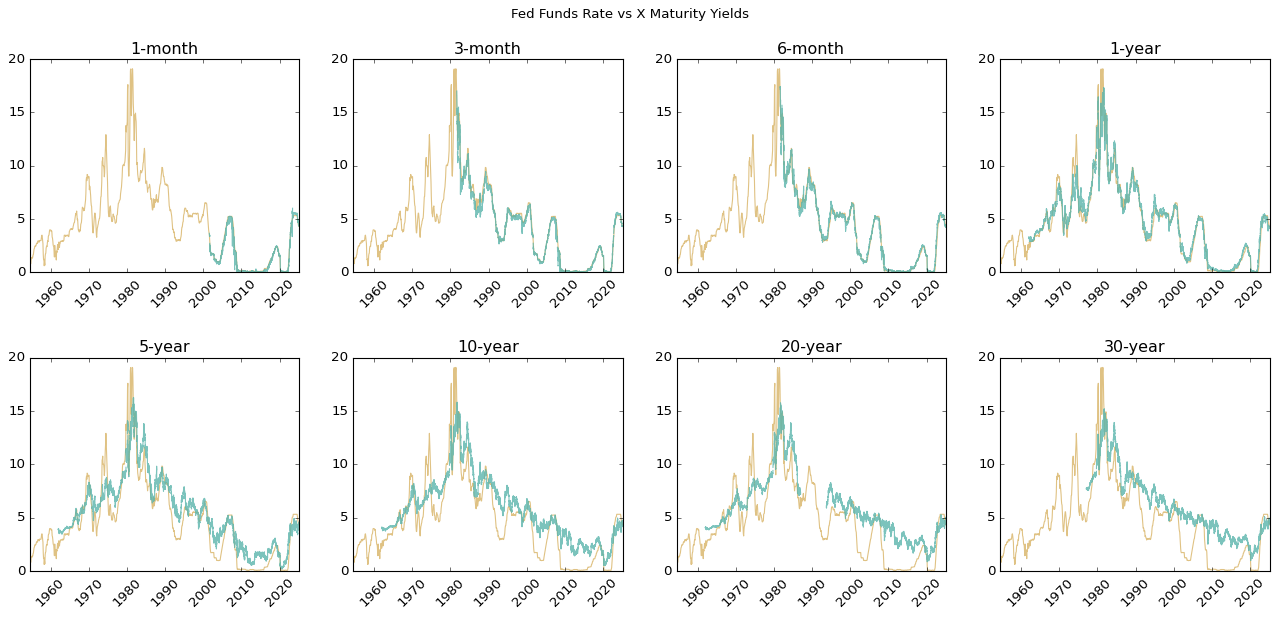

In [39]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 8))
fig.suptitle('Fed Funds Rate vs X Maturity Yields')

# Adjust vertical spacing between rows
plt.subplots_adjust(hspace=0.4)  # Increase spacing between rows

# Short-term bills
ax1.plot(yff.data.index, yff.data.values, '-', color='#d8b365', alpha=0.8)  
ax1.plot(y1m.data.index, y1m.data.values, '-', color='#5ab4ac', alpha=0.8)
ax1.set_title('1-month')
ax1.tick_params(axis='x', rotation=45)

ax2.plot(yff.data.index, yff.data.values, '-', color='#d8b365', alpha=0.8)
ax2.plot(y3m.data.index, y3m.data.values, '-', color='#5ab4ac', alpha=0.8)
ax2.set_title('3-month')
ax2.tick_params(axis='x', rotation=45)

ax3.plot(yff.data.index, yff.data.values, '-', color='#d8b365', alpha=0.8)
ax3.plot(y6m.data.index, y6m.data.values, '-', color='#5ab4ac', alpha=0.8)
ax3.set_title('6-month')
ax3.tick_params(axis='x', rotation=45)

ax4.plot(yff.data.index, yff.data.values, '-', color='#d8b365', alpha=0.8)
ax4.plot(y1.data.index, y1.data.values, '-', color='#5ab4ac', alpha=0.8)
ax4.set_title('1-year')
ax4.tick_params(axis='x', rotation=45)

# Bottom row: long-term bonds
ax5.plot(yff.data.index, yff.data.values, '-', color='#d8b365', alpha=0.8)
ax5.plot(y5.data.index, y5.data.values, '-', color='#5ab4ac', alpha=0.8)
ax5.set_title('5-year')
ax5.tick_params(axis='x', rotation=45)

ax6.plot(yff.data.index, yff.data.values, '-', color='#d8b365', alpha=0.8)
ax6.plot(y10.data.index, y10.data.values, '-', color='#5ab4ac', alpha=0.8)
ax6.set_title('10-year')
ax6.tick_params(axis='x', rotation=45)

ax7.plot(yff.data.index, yff.data.values, '-', color='#d8b365', alpha=0.8)
ax7.plot(y20.data.index, y20.data.values, '-', color='#5ab4ac', alpha=0.8)
ax7.set_title('20-year')
ax7.tick_params(axis='x', rotation=45)

ax8.plot(yff.data.index, yff.data.values, '-', color='#d8b365', alpha=0.8)
ax8.plot(y30.data.index, y30.data.values, '-', color='#5ab4ac', alpha=0.8)
ax8.set_title('30-year')
ax8.tick_params(axis='x', rotation=45)

plt.show()
